In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def distance(a, b):
    return np.sum((a - b) ** 2)

In [3]:
def min_dist(a):
    return np.argmin([distance(a, C[i]) for i in range(len(C))])

In [4]:
def assign_clusters(L):
    return np.array([min_dist(x) for x in L])

In [5]:
def get_clusters(arr):
    return [np.where(arr == i)[0] for i in range(len(C))]

In [6]:
def get_means(arr):
    return [np.mean(x[i], axis=0) for i in arr]

In [7]:
x = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])
#C = np.array([[2, 10], [5, 8], [1, 2]])

In [11]:
n_clusters = 3
lower_limits = [min(x.T[i]) for i in range(x.shape[1])]
upper_limits = [max(x.T[i]) for i in range(x.shape[1])]

C = [[np.random.uniform(lower_limits[i], upper_limits[i]) for i in range(x.shape[1])] for _ in range(n_clusters)]

In [12]:
C

[[2.6053249813614565, 2.328905941964897],
 [7.595504361707384, 4.739885463927571],
 [1.2871169889098493, 4.603689209694255]]

In [10]:
def step():
    global C, clusters
    clusters = get_clusters(assign_clusters(x))
    C = get_means(clusters)

In [13]:
step()

In [14]:
C

[array([1., 2.]), array([6.5 , 5.25]), array([2.66666667, 8.        ])]

In [15]:
clusters

[array([6]), array([2, 3, 4, 5]), array([0, 1, 7])]

In [16]:
def WSS():
    """
    Finds the sum of all within-cluster sum of squares
    """
    sum_ = 0
    for i in range(len(C)):
        center = C[i]
        for j in clusters[i]:
            point = x[j]
            sum_ += distance(point, center)
    return sum_

In [17]:
WSS()

18.166666666666664

## Automate the process and plot elbow curve

In [18]:
x

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

In [39]:
errors = []

for i in range(1, 6):  # up to 5 clusters
    n_clusters = i
    lower_limits = [min(x.T[i]) for i in range(x.shape[1])]
    upper_limits = [max(x.T[i]) for i in range(x.shape[1])]

    C = [[np.random.uniform(lower_limits[i], upper_limits[i]) for i in range(x.shape[1])] for _ in range(n_clusters)]
    
    for _ in range(5):  # number of steps
        step()

    errors.append(WSS())

In [40]:
C

[array([2. , 7.5]),
 array([7.        , 4.33333333]),
 array([5., 8.]),
 array([4., 9.]),
 array([1., 2.])]

In [41]:
errors

[35.75, 23.5, 19.2, 8.666666666666668, 8.333333333333332]

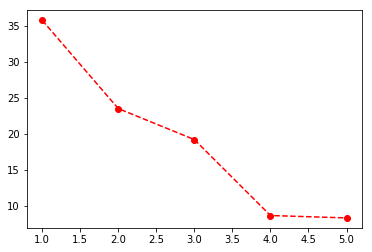

In [42]:
plt.plot(range(1, len(errors)+1), errors, 'ro--');

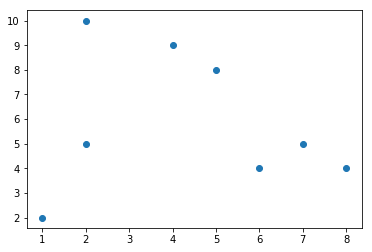

In [46]:
plt.scatter(x.T[0], x.T[1]);

In [47]:
clusters

[array([0, 1]), array([2, 4, 5]), array([3]), array([7]), array([6])]

In [48]:
x

array([[ 2, 10],
       [ 2,  5],
       [ 8,  4],
       [ 5,  8],
       [ 7,  5],
       [ 6,  4],
       [ 1,  2],
       [ 4,  9]])

In [50]:
n_clusters = 4
lower_limits = [min(x.T[i]) for i in range(x.shape[1])]
upper_limits = [max(x.T[i]) for i in range(x.shape[1])]

C = [[np.random.uniform(lower_limits[i], upper_limits[i]) for i in range(x.shape[1])] for _ in range(n_clusters)]
    
for _ in range(5):  # number of steps
    step()

In [52]:
C

[array([4.5, 8.5]),
 array([1., 2.]),
 array([7.        , 4.33333333]),
 array([2. , 7.5])]

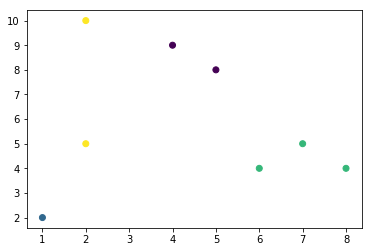

In [53]:
plt.scatter(x.T[0], x.T[1], c=assign_clusters(x));

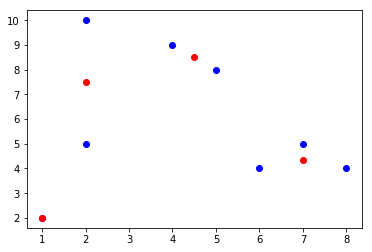

In [57]:
plt.plot(x.T[0], x.T[1], 'bo', np.array(C).T[0], np.array(C).T[1], 'ro');

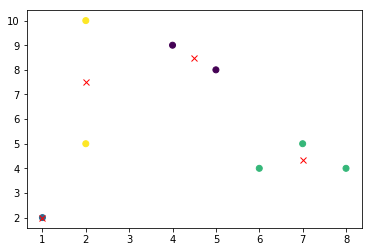

In [59]:
plt.scatter(x.T[0], x.T[1], c=assign_clusters(x));
plt.plot(np.array(C).T[0], np.array(C).T[1], 'rx');